In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("resnet34_3d_seg-round-2.csv")
df

,epoch,lr,loss_train,loss_val,fbeta_0.20,fbeta_0.25,fbeta_0.30,fbeta_0.35,fbeta_0.40,fbeta_0.45,...,fbeta_0.55,fbeta_0.60,fbeta_0.65,fbeta_0.70,fbeta_0.75,fbeta_0.80,fbeta_0.85,fbeta_0.90,fbeta_0.95,accuracy
0,1,4.000000e-06,0.699520,0.621398,0.109900,0.124484,0.150299,0.159378,0.163043,0.166395,...,0.150348,0.059498,0.003600,0.000096,0.000000,0.000000,0.000000,0.000000,0.000000,0.700740
1,2,6.894754e-06,0.680776,0.676862,0.110891,0.134897,0.154240,0.159543,0.161587,0.163450,...,0.170830,0.175651,0.176910,0.171859,0.142569,0.019979,0.000000,0.000000,0.000000,0.522612
2,3,1.522987e-05,0.662998,0.571653,0.149985,0.159498,0.164184,0.170441,0.189107,0.213459,...,0.240816,0.203771,0.119532,0.031778,0.006670,0.000000,0.000000,0.000000,0.000000,0.842546
3,4,2.800000e-05,0.649128,0.547710,0.156585,0.160855,0.164461,0.178558,0.208433,0.228736,...,0.206947,0.110654,0.012214,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.875802
4,5,4.366489e-05,0.628066,0.525940,0.163434,0.178684,0.196754,0.219954,0.237421,0.245339,...,0.261304,0.261493,0.239347,0.149810,0.037752,0.000833,0.000000,0.000000,0.000000,0.881905
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,96,4.869946e-07,0.372284,0.370241,0.466918,0.487498,0.503136,0.515965,0.527105,0.537211,...,0.555731,0.564466,0.573545,0.583048,0.592252,0.601596,0.612841,0.620910,0.593072,0.925885
96,97,2.743041e-07,0.366940,0.370206,0.470462,0.490474,0.506302,0.519741,0.530985,0.540980,...,0.558683,0.567307,0.575997,0.585070,0.594863,0.604564,0.615556,0.624281,0.592938,0.926665
97,98,1.221970e-07,0.363516,0.368536,0.482187,0.502866,0.518173,0.530469,0.541268,0.550804,...,0.567713,0.576164,0.583981,0.592821,0.601803,0.612021,0.623731,0.628377,0.579952,0.928848
98,99,3.085853e-08,0.364488,0.368287,0.472394,0.493560,0.510898,0.523716,0.534958,0.545135,...,0.562159,0.571064,0.580203,0.588973,0.598517,0.608626,0.621607,0.630086,0.590558,0.927455


(0.3, 0.6)

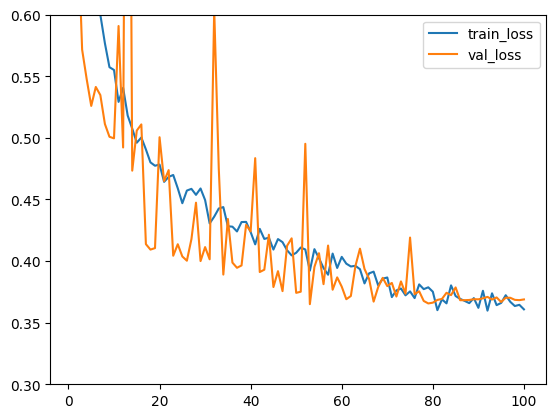

In [2]:
plt.plot(df["epoch"], df["loss_train"], label="train_loss")
plt.plot(df["epoch"], df["loss_val"], label="val_loss")
# plot the moving average of the validation loss
# plt.plot(df["epoch"], df["loss_train"].rolling(2).mean(), label="val_loss")

plt.legend()
plt.ylim(0.3, 0.6)

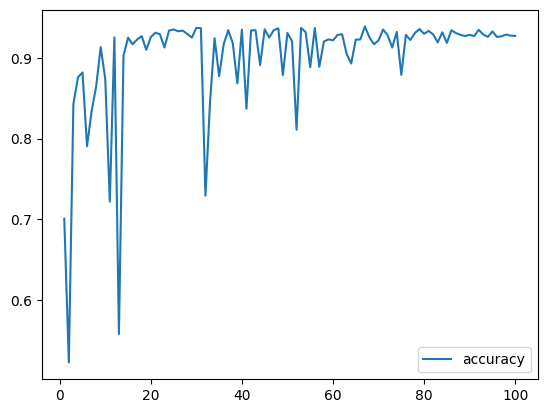

In [3]:
plt.plot(df["epoch"], df["accuracy"], label="accuracy")

plt.legend()
# plt.ylim(0.3, 0.6)

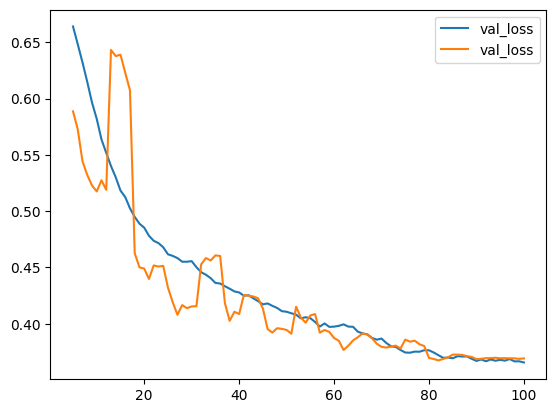

In [4]:
plt.plot(df["epoch"], df["loss_train"].rolling(5).mean(), label="val_loss")
plt.plot(df["epoch"], df["loss_val"].rolling(5).mean(), label="val_loss")

plt.legend()
# plt.ylim(0.05, 0.3)

(100, 16)


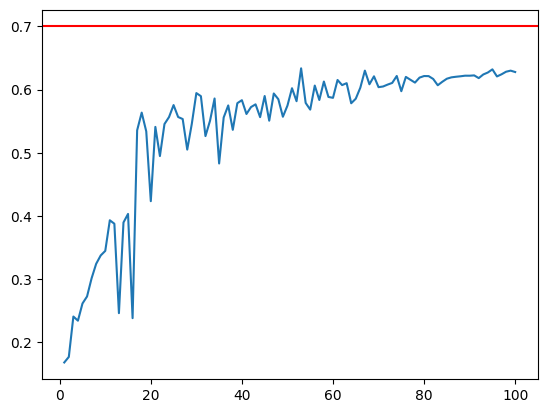

In [5]:
# take columns that start with "fbeta_"
df_fbeta = df.filter(regex=("fbeta_.*")).values
print(df_fbeta.shape)
df_fbeta = np.max(df_fbeta, axis=1)
plt.plot(df["epoch"], df_fbeta, label="fbeta_max")

# put horizontal line at 0.55
plt.axhline(y=0.7, color='r', linestyle='-')


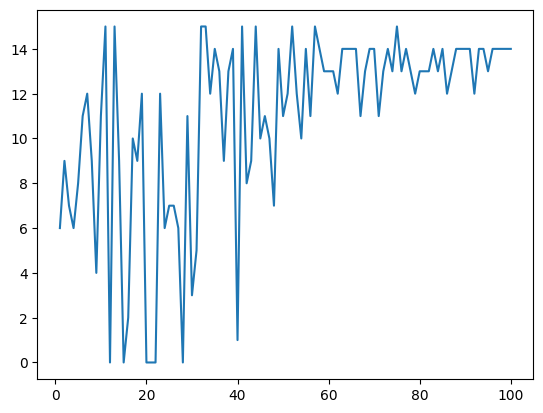

In [6]:
# take columns that start with "fbeta_"
df_fbeta = df.filter(regex=("fbeta_.*")).values
df_fbeta = np.argmax(df_fbeta, axis=1)
df_fbeta.shape
plt.plot(df["epoch"], df_fbeta, label="fbeta_max")